# Regresja za pomocą sieci neuronowej

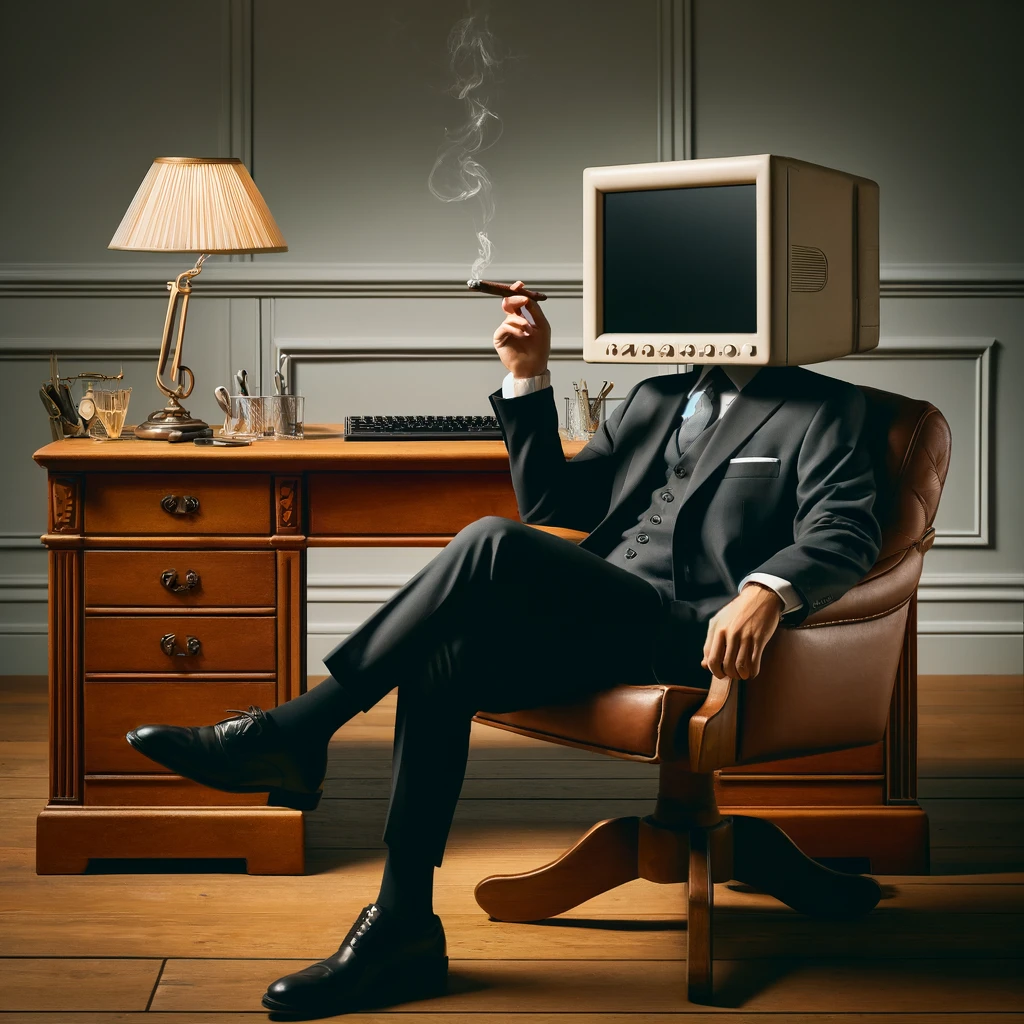

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

In [7]:
import jax
import jax.numpy as jnp
from jax import grad, jit, vmap
from jax import random
import math

class SimpleNN:
    def __init__(self, Din, Dout, hidden_size=44):
        # Set a random seed for reproducibility
        self.key = random.PRNGKey(0)
        self.key, self.subkey = random.split(self.key)
        self.input_dim = Din
        self.hidden_dim = hidden_size
        self.output_dim = Dout
        self.params = [
            random.normal(self.subkey, (self.input_dim, self.hidden_dim)),  random.normal(self.subkey, (self.hidden_dim,)),
            random.normal(self.subkey, (self.hidden_dim, self.output_dim)),  random.normal(self.subkey, (self.output_dim,)),
        ]
        self.mems = [ jnp.zeros_like(param) for param in self.params]
        self.prev_loss = math.inf

    # Define the neural network model
    def neural_network(self, params, x):
        w1, b1, w2, b2 = params
        z = jnp.dot(x, w1) + b1
        h = jax.nn.relu(z)
        #h = jnp.tanh(z)
        return jnp.dot(h, w2) + b2

    def predict(self, x):
      return self.neural_network(self.params, x)

    # Define the mean squared error loss function
    def mean_squared_error(self, params, x, y_true):
        y_pred = self.neural_network(params, x)
        return jnp.mean((y_pred - y_true)**2)

    # Initialize the neural network parameters
    def fit(self, X, Y, num_epochs, learning_rate):
        for epoch in range(num_epochs):
            #random subset of indices makes it a stochastic gradient descent
            random_indices = np.random.choice(len(X), min(len(X),256), replace=False)

            grads = grad(self.mean_squared_error)(self.params, X[random_indices], Y[random_indices])

            self.mems = [ 0.99*mem + grad**2 for mem, grad in zip(self.mems, grads)]
            self.params = [param - learning_rate * grad_param / jnp.sqrt( mem + 1e-8) for param, grad_param, mem in zip(self.params, grads, self.mems)]

            loss_value = self.mean_squared_error(self.params, X[random_indices], Y[random_indices])
            self.prev_loss = loss_value
            
            # Print the loss every 100 epochs
            if epoch % 100 == 0:
                loss_value = self.mean_squared_error(self.params, X, Y)
                print(f"\rLoss: {loss_value}", end="")
        



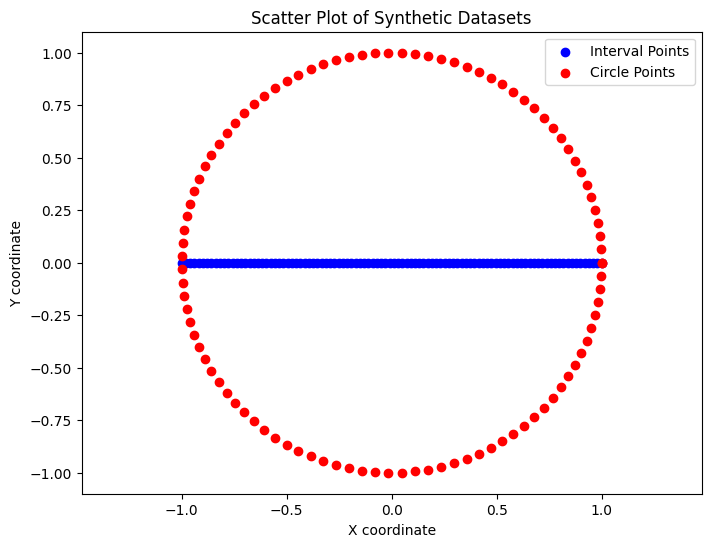

In [8]:
import numpy as np
import matplotlib.pyplot as plt

N44 = 100
# Set a seed for reproducibility
np.random.seed(44)

# 1. Create a synthetic dataset of 100 random points on -1, 1 interval in 2 dimensions
points_interval = np.zeros((N44, 2))
points_interval[:,0] = np.linspace(-1,1, N44)
points_interval[:,1] = 0
points_interval = points_interval +  np.random.normal(size=(N44,2)) * 0

# 2. Create a synthetic dataset of 100 random points on a radius 1 circle in 2 dimensions
theta = (points_interval[:,0] + 1 ) * np.pi  #np.linspace(0, 2 * np.pi, N44)
radius = 1
points_circle = np.column_stack([radius * np.cos(theta), radius * np.sin(theta)])
points_circle = points_circle + np.random.normal(size=(N44,2)) * 0.0

# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(points_interval[:, 0], points_interval[:, 1], color='blue', label='Interval Points')
plt.scatter(points_circle[:, 0], points_circle[:, 1], color='red', label='Circle Points')
plt.title('Scatter Plot of Synthetic Datasets')
plt.xlabel('X coordinate')
plt.ylabel('Y coordinate')
plt.legend()
plt.axis('equal')  # This ensures that the scale of the plot is the same on both axes
plt.show()


In [9]:
X = points_interval
Y = points_circle

In [10]:
simpleNN = SimpleNN(2,2)
plots = []  # Store the configurations for each frame

In [11]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

fig, ax = plt.subplots()


# Assuming you have X, Y, and a simpleNN object defined somewhere

for i in range(30):

    simpleNN.fit(X, Y, num_epochs=101, learning_rate=0.01)
    Y_learnt = simpleNN.predict(X)
    
    # Store each plot configuration in the list
    plots.append((X, Y, Y_learnt))

# Set fixed x and y ranges
x_min, x_max = -2, 2  # Example ranges
y_min, y_max = -2, 2

# Function to update the frames in the animation
def update(frame):
    ax.clear()  # Clear previous frame
    X, Y, Y_learnt = plots[frame]
    ax.scatter(Y[:, 0], Y[:, 1], color='green', label='True Transformed Points')  # True points
    ax.scatter(Y_learnt[:, 0], Y_learnt[:, 1], color='red', label='Predicted Points')  # Predicted points
    ax.legend()
    ax.set_title('True vs. Predicted Points Over Training')
    ax.set_xlabel('X-axis')
    ax.set_ylabel('Y-axis')
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)

# Create the animation using FuncAnimation
ani = FuncAnimation(fig, update, frames=len(plots), repeat=False)

# Display the animation in a Jupyter notebook
plt.close(fig)
HTML(ani.to_jshtml())


Loss: 0.00043678164365701384